# Prob 3

To Integrate: The Logistic Differential Equation without using  apredefined differential equation solver.
In essence, To Implement: Euler method for solving Differential Equations

$$\dot{N} = \mu N \left( 1 - \frac{N}{K}\right)$$

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider, Button

In [93]:
# Setting the initial parameters
K_, N0_, mu_ = 4.75, 0.25, 4.75

# Defining a function for Right Hand Side of the differential equation
def rhs(t, N):
    return mu_*N*(1 - N/K_)

# Defining the function to plot the exact function for comparisons
def logisticGrowth(K, N0, mu, t):
    denom = 1 + (K/N0 - 1)*np.exp(-mu*t)
    return K/denom


In [167]:
# Defining the start and end of time of evaluation
t_start = 0
t_end = 5

# Defining the Step size
h = [0.01, 0.1, 0.5]

# Finding the number of intervals corresponding to different step sizes
n = [int((t_end - t_start)/h[i]) for i in range(len(h))]


Text(0, 0.5, '$N(t)$')

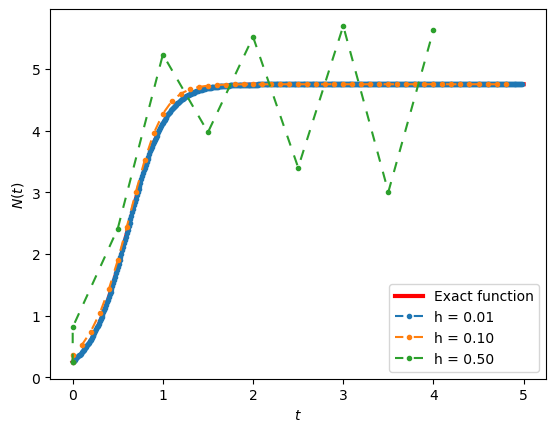

In [177]:
# Storing the calculated function in an array for discrete steps
func_calculated = [np.zeros(n[i]) for i in range(0, len(h))]
for i in range(len(h)):
    func_calculated[i][0] = N0_
    
# Setting up the time axis
time_ = [np.zeros(n[i]) for i in range(0, len(h))]
for i in range(len(h)):
    time_[i][0] = t_start

for i in range(0, len(h)):
    for j in range(0 ,n[i] - 1):
        t = t_start + j*h[i]
        time_[i][j+1] = t
        func_calculated[i][j+1] = func_calculated[i][j] + h[i]*rhs(t, func_calculated[i][j])

# Defining the time axis for the exact function
time_exact = np.linspace(0, 5, 100)

# Plotting

fig1, ax = plt.subplots()

plt.plot(time_exact, logisticGrowth(K_, N0_, mu_, time_exact), color="red", label = "Exact function", linewidth = 3)

for i in range(len(h)):
    plt.plot(time_[i], func_calculated[i], marker = ".", linestyle=(1, (5, 5)), label = "h = %.2f" %h[i])

ax.legend()
ax.set_xlabel("$t$")
ax.set_ylabel("$N(t)$")